**Image Processing**

---

First step in classifying images: process the images and save them in another folder to be used for training.

Processes:


*   Make images the same size
*   Make images black and white
*   Save the processed images into x_train and y_train

In [146]:
# Imports

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [147]:
# Get the data from google drive

In [148]:
import pathlib
data_dir = "/home/mara/github/urban-waste-detection/input/trashnet"
data_dir = pathlib.Path(data_dir)

In [149]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2527


In [150]:
cardboard = list(data_dir.glob('cardboard/*'))
glass = list(data_dir.glob('glass/*'))
metal = list(data_dir.glob('metal/*'))
paper = list(data_dir.glob('paper/*'))
plastic = list(data_dir.glob('plastic/*'))
trash = list(data_dir.glob('trash/*'))

classes = [cardboard, glass, metal, paper, plastic, trash]

In [151]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(255,255),
    batch_size=32
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [152]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(255,255),
    batch_size=32
)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [153]:
class_names = train_ds.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


2022-02-15 18:53:28.275908: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 199 of 256
2022-02-15 18:53:31.951646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.
<ipython-input-154-484f4f43fd20>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3,3,i+1)


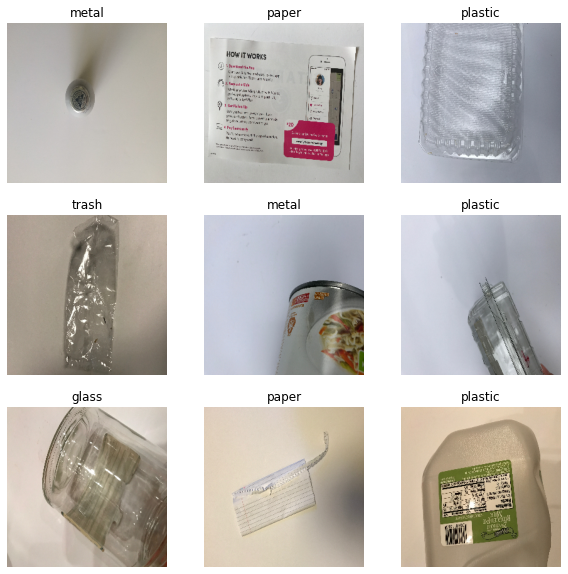

In [154]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

(3,)


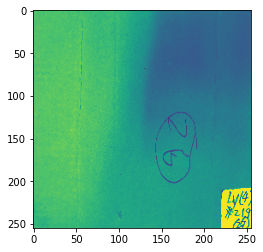

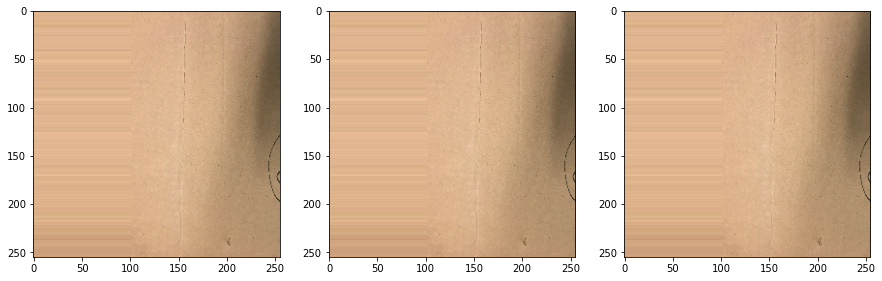

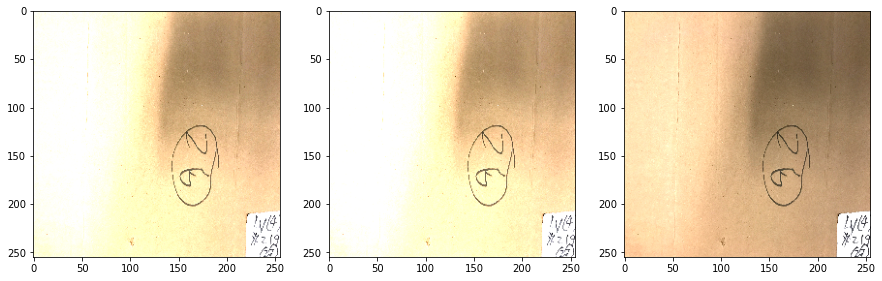

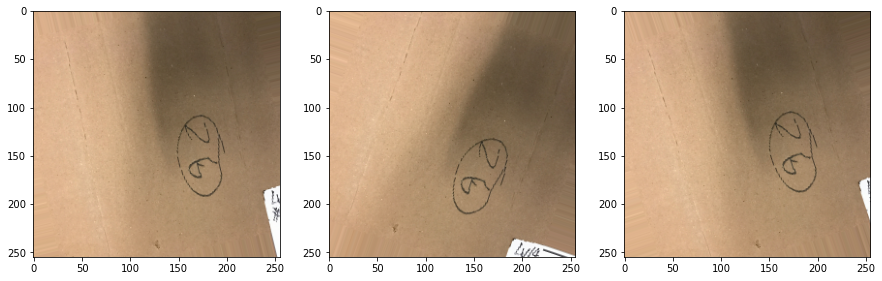

In [155]:
# Testing processing stuff

import skimage.color as io
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

im_size = 255

# Step 1 - Make image gray
gray_im = io.rgb2gray(images[10])
# plt.imshow(im, cmap = 'gray')

# Step 2 - Normalise the image
norm_im = (gray_im - np.min(gray_im)) / (np.max(gray_im) - np.min(gray_im))
plt.imshow(norm_im)

im = norm_im.reshape(-1, im_size, im_size, 1)

# Step 3 - Data augmentation

tester = expand_dims(images[10].numpy(), 0)

datagen = ImageDataGenerator(width_shift_range=[-100,100])
it = datagen.flow(tester, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
  image = next(it)[0].astype('uint8')
  im[i].imshow(image)

datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
it = datagen.flow(tester, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
  image = next(it)[0].astype('uint8')
  im[i].imshow(image)

datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')
it = datagen.flow(tester, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
  image = next(it)[0].astype('uint8')
  im[i].imshow(image)

# Step 4 - Standardise the data
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

print(im.shape)

*Step 1 - Make images gray*

---

*Step 2 - Normalise images*

---

*Step 3 - Data Augmentation*

---

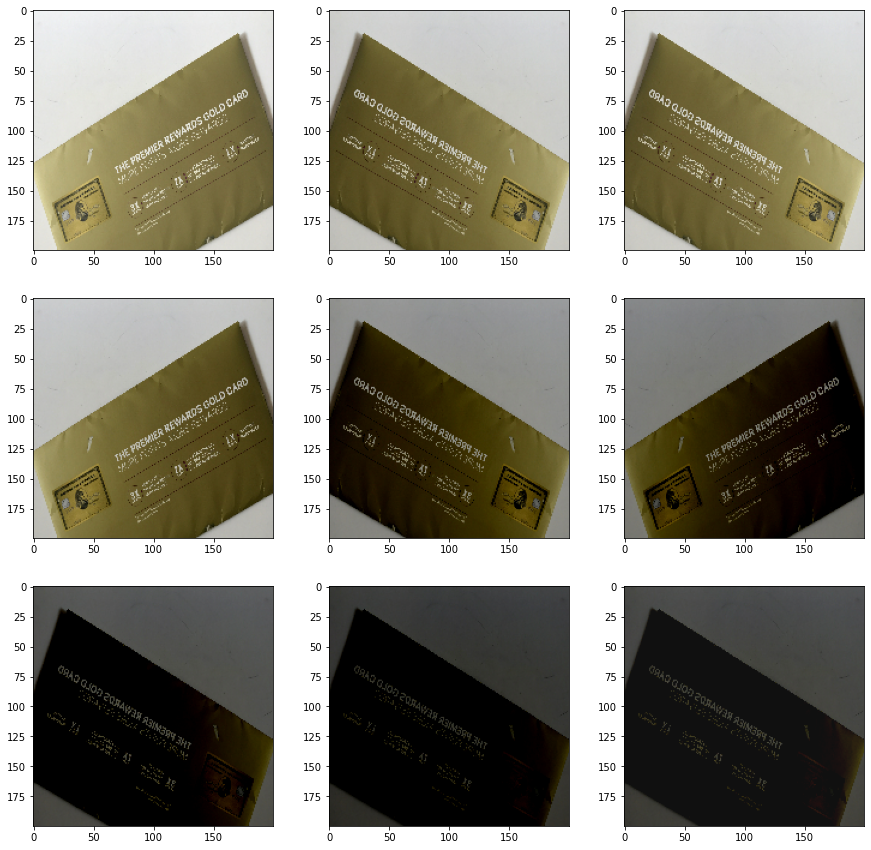

In [156]:
from keras.preprocessing.image import ImageDataGenerator

# Random Flipping, Random Cropping, Random Brightness
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_crop(image, size=(200,200, 3))
    image = tf.image.random_brightness(image, max_delta=0.2)
    return image, label

# Test for one image
image = images[11]
fig, im = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
      aug_image, label = augment(image, 0)
      image = aug_image.numpy().astype("uint8")
      im[i][j].imshow(image)
    
# Apply to the whole dataset
# train_ds = train_ds.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)

*Step 4 - Standardise Data*

---

In [157]:
new_classes = []
for i in range(len(classes)):
  new_classes.append((len(classes[i]), class_names[i]))

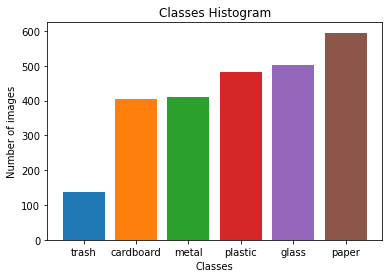

In [158]:
# Unbalanced classes

for c in sorted(new_classes, key=lambda tup: tup[0]):
  plt.bar(c[1], c[0])

plt.title("Classes Histogram")
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.show()